<a href="https://colab.research.google.com/github/adu-CS/adu-CS/blob/main/cats_v_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2

In [5]:
#importing libraries
import os
import random
import matplotlib.pyplot as plt
import pickle


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
#API command
!kaggle datasets download -d salader/dogs-vs-cats


 99% 1.06G/1.06G [00:08<00:00, 137MB/s]
100% 1.06G/1.06G [00:09<00:00, 127MB/s]


In [9]:
#extracting zip files
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')#unzipping and extracting from zip file
zip_ref.close()

In [11]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [12]:
from keras.utils.image_dataset import image_dataset_from_directory
#generators
#arranging the vast amount of data(images) into uniform batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',     #classification(0 for dog, 1 for cat)
    batch_size=32,        #allocating size for each batch
    image_size=(256, 256) #reshape to size
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',     #classification(0 for dog, 1 for cat)
    batch_size=32,        #allocating size for each batch
    image_size=(256, 256) #reshape to size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#Normalize
#values of numpy array are stored from 0-255
#we normalize the valuse between 0-1
def process(image, label):
  image=tf.cast(image/255, tf.float32)
  return image, label

train_ds=train_ds.map(process)#maps an image from 'train_ds' to 'process' function, where it converts the image into a label of 0-1
validation_ds=validation_ds.map(process)#same for test



In [19]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])#Adam optimizer alg., loss function='binary_crossentropy'

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 95ms/step - loss: 0.6306 - accuracy: 0.6289 - val_loss: 0.5239 - val_accuracy: 0.7388
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.5098 - accuracy: 0.7462 - val_loss: 0.4764 - val_accuracy: 0.7800
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4098 - accuracy: 0.8108 - val_loss: 0.4798 - val_accuracy: 0.7922
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3036 - accuracy: 0.8694 - val_loss: 0.5700 - val_accuracy: 0.7952
Epoch 5/10
625/625 [==============================] - 63s 99ms/step - loss: 0.1892 - accuracy: 0.9243 - val_loss: 0.7989 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1173 - accuracy: 0.9549 - val_loss: 0.9371 - val_accuracy: 0.7868
Epoch 7/10
625/625 [==============================] - 74s 118ms/step - loss: 0.0729 - accuracy: 0.9737 - val_loss: 1.2148 - val_accurac

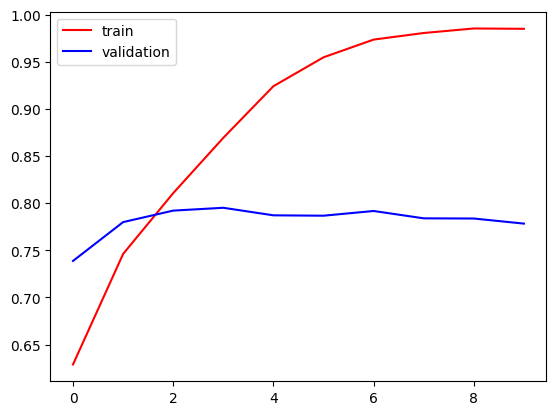

In [20]:
#train accuracy vs validation accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

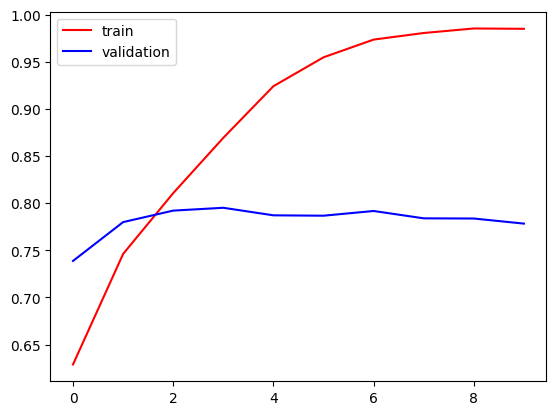

In [21]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

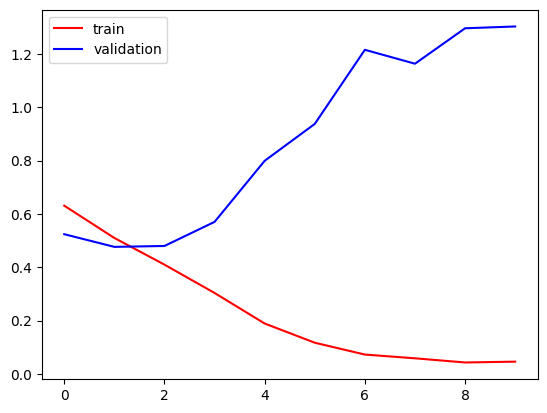

In [22]:
#train_loss vs validation_loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [27]:
test_img = cv2.imread('/content/dog.jpg')

TypeError: ignored

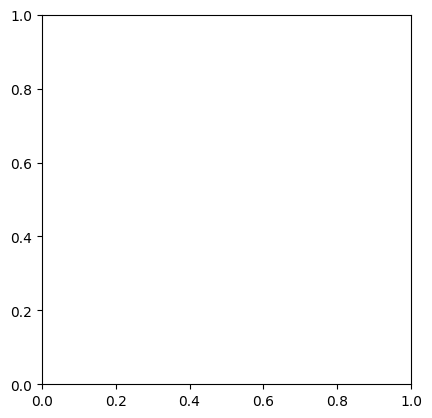

In [28]:
plt.imshow(test_img)